In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

df = pd.read_csv("04-LinearReg_Salary.csv")
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

x = df["YearsExperience"].values.astype(float)
y = df["Salary"].values.astype(float)

w = 0.0

In [42]:
y_hat=w*x

loss = ((y_hat-y)**2).mean()
print(loss)

6503107277.733334


In [43]:
dldw = (2 * (w * x - y) * x).mean()
dldw

np.float64(-970008.8266666668)

In [44]:
w=w-0.001*dldw
w

np.float64(970.0088266666668)

In [45]:
y_hat = w * x
loss = ((y_hat - y) ** 2).mean()
print(loss)

5597088142.766166


In [46]:
def forward(w, x):
    return w * x

def lossfunc(y_pred, y):
    return ((y_pred - y) ** 2).mean()   # MSE

def gradient(w, y, x):
    gr = (2 * (w * x - y) * x).mean()
    return gr

w = 0.0
n_epoch = 10
lr = 0.001
ws = np.array([w])


for epoch in range(n_epoch):
    y_hat = forward(w, x)

    loss = lossfunc(y_hat, y)

    gr = gradient(w, y, x)

    w = w - lr * gr

    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {loss:.3f}')
    ws = np.append(ws, w)

epoch 1: w = 970.009, loss = 6503107277.733
epoch 2: w = 1868.064, loss = 5597088142.766
epoch 3: w = 2699.502, loss = 4820498243.345
epoch 4: w = 3469.265, loss = 4154847984.308
epoch 5: w = 4181.929, loss = 3584289099.000
epoch 6: w = 4841.728, loss = 3095237322.657
epoch 7: w = 5452.584, loss = 2676048968.744
epoch 8: w = 6018.127, loss = 2316743707.916
epoch 9: w = 6541.719, loss = 2008766949.370
epoch 10: w = 7026.472, loss = 1744786167.162


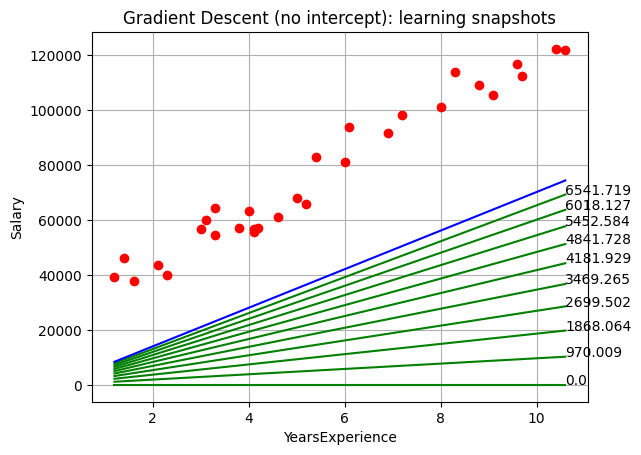

In [47]:
fig = plt.figure()

xv = np.linspace(x.min(), x.max(), 1000)
plt.grid()

plt.plot(x, y, 'ro', label='data')

for i in range(len(ws) - 1):
    plt.plot(xv, ws[i] * xv, 'g')
    plt.annotate(
        round(ws[i], 3),
        xy=(x.max(), ws[i] * x.max())
    )

plt.plot(xv, ws[-1] * xv, 'b', label='final line')

plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Gradient Descent (no intercept): learning snapshots")
plt.show()


In [48]:
def forward(w, b, x):
    return w * x + b

def lossfunc(y_pred, y):
    return ((y_pred - y) ** 2).mean()

def gradient(w, b, y, x):
    y_hat = w * x + b
    gr_w = (2 * (y_hat - y) * x).mean()
    gr_b = (2 * (y_hat - y)).mean()
    return gr_w, gr_b

w = 0.0
b = 0.0
n_epoch = 10
lr = 0.001

param = np.array([[w, b]])

for epoch in range(n_epoch):
    y_hat = forward(w, b, x)

    loss = lossfunc(y_hat, y)

    gr_w, gr_b = gradient(w, b, y, x)

    w = w - lr * gr_w
    b = b - lr * gr_b

    print(f'epoch {epoch+1}: w= {w:.3f}, b= {b:.3f}, loss = {loss:.3f}')
    param = np.vstack((param, [w, b]))

epoch 1: w= 970.009, b= 152.008, loss = 6503107277.733
epoch 2: w= 1866.418, b= 293.210, loss = 5575601199.409
epoch 3: w= 2694.804, b= 424.425, loss = 4783307298.078
epoch 4: w= 3460.321, b= 546.408, loss = 4106512380.501
epoch 5: w= 4167.732, b= 659.859, loss = 3528377330.380
epoch 6: w= 4821.440, b= 765.425, loss = 3034518083.486
epoch 7: w= 5425.514, b= 863.702, loss = 2612647694.347
epoch 8: w= 5983.714, b= 955.242, loss = 2252270587.675
epoch 9: w= 6499.517, b= 1040.556, loss = 1944421386.285
epoch 10: w= 6976.134, b= 1120.115, loss = 1681441816.482


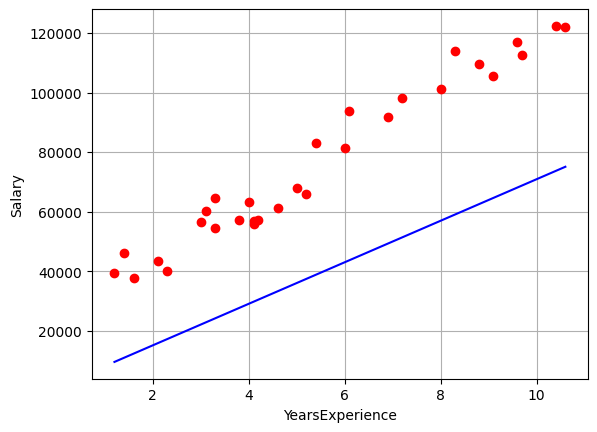

In [49]:
fig = plt.figure()
xv = np.linspace(x.min(), x.max(), 1000)
plt.grid()

plt.plot(x, y, 'ro')
w_final, b_final = param[-1]
plt.plot(xv, w_final * xv + b_final, 'b')

plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [50]:
def forward(w, b, x_batch):
    return w * x_batch + b

def lossfunc(y_pred, y_batch):
    return ((y_pred - y_batch) ** 2).mean()

def gradient(w, b, y_batch, x_batch):
    y_hat = w * x_batch + b
    gr_w = (2 * (y_hat - y_batch) * x_batch).mean()
    gr_b = (2 * (y_hat - y_batch)).mean()
    return gr_w, gr_b

def shuffle_data(X, Y):
    N = X.shape[0]
    shuffled_idx = np.random.permutation(N)
    return X[shuffled_idx], Y[shuffled_idx]

w = 0.0
b = 0.0
n_epoch   = 10
lr        = 0.001
batch_size = 6
N = x.shape[0]
n_batches = int(np.ceil(N / batch_size))

param = np.array([[w, b]])

for epoch in range(n_epoch):
    x_shuf, y_shuf = shuffle_data(x, y)

    running_loss = 0.0
    bn = 1

    for lb_idx in range(0, N, batch_size):
        ub_idx   = lb_idx + batch_size
        x_batch  = x_shuf[lb_idx:ub_idx]
        y_batch  = y_shuf[lb_idx:ub_idx]

        y_hat = forward(w, b, x_batch)

        loss = lossfunc(y_hat, y_batch)
        running_loss += loss * x_batch.shape[0]

        gr_w, gr_b = gradient(w, b, y_batch, x_batch)

        w = w - lr * gr_w
        b = b - lr * gr_b

        print(f'epoch {epoch+1}, batch {bn}: loss = {loss:.3f}')
        bn += 1

    avg_loss = running_loss / N
    print(f'epoch {epoch+1}: w= {w:.3f}, b= {b:.3f}, avg_loss = {avg_loss:.3f}')
    param = np.vstack((param, [w, b]))

epoch 1, batch 1: loss = 10389361482.333
epoch 1, batch 2: loss = 6604671194.532
epoch 1, batch 3: loss = 2066937505.289
epoch 1, batch 4: loss = 2616882111.478
epoch 1, batch 5: loss = 3233743786.641
epoch 1: w= 4227.410, b= 653.234, avg_loss = 4982319216.055
epoch 2, batch 1: loss = 3352553591.591
epoch 2, batch 2: loss = 2167781640.060
epoch 2, batch 3: loss = 2210505371.287
epoch 2, batch 4: loss = 2336068763.436
epoch 2, batch 5: loss = 1329486828.509
epoch 2: w= 7033.890, b= 1109.831, avg_loss = 2279279238.976
epoch 3, batch 1: loss = 1157787140.218
epoch 3, batch 2: loss = 1283604837.731
epoch 3, batch 3: loss = 1310121540.360
epoch 3, batch 4: loss = 905623675.587
epoch 3, batch 5: loss = 879338487.987
epoch 3: w= 8908.504, b= 1433.631, avg_loss = 1107295136.377
epoch 4, batch 1: loss = 693346088.133
epoch 4, batch 2: loss = 731800441.219
epoch 4, batch 3: loss = 482965839.593
epoch 4, batch 4: loss = 533884970.325
epoch 4, batch 5: loss = 455324782.452
epoch 4: w= 10176.841, b

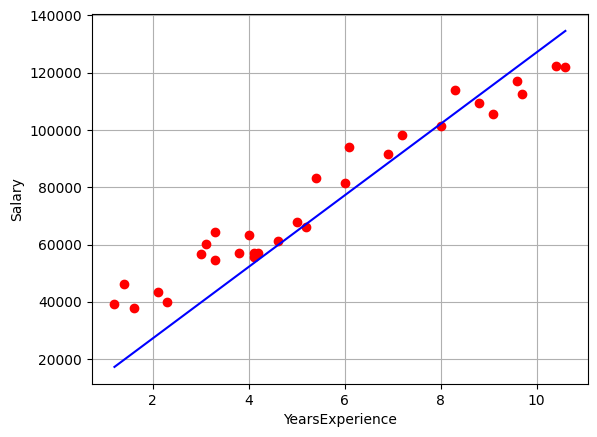

In [51]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
xv = np.linspace(x.min(), x.max(), 1000)

plt.grid()
plt.plot(x, y, 'ro')

w_final, b_final = param[-1]
plt.plot(xv, w_final * xv + b_final, 'b')

plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [54]:
xt = torch.tensor(x, dtype=torch.float32).reshape(-1, 1)
yt = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

n_sample, n_features = xt.shape

model = nn.Linear(n_features, 1)

with torch.inference_mode():
    model.weight[0][0] = 0.0
    model.bias[0] = 0.0

lossfn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
n_epoch = 10

for epoch in range(n_epoch):
    y_pred = model(xt)

    loss = lossfn(y_pred, yt)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    (w,), = model.weight.detach().numpy()
    (b,)  = model.bias.detach().numpy()
    print(f"epoch {epoch+1}: w= {w:.3f}, b= {b:.3f}, loss = {loss.item():.3f}")

epoch 1: w= 97.001, b= 15.201, loss = 6503106560.000
epoch 2: w= 193.266, b= 30.294, loss = 6407070208.000
epoch 3: w= 288.800, b= 45.279, loss = 6312482816.000
epoch 4: w= 383.610, b= 60.158, loss = 6219323392.000
epoch 5: w= 477.700, b= 74.932, loss = 6127568896.000
epoch 6: w= 571.076, b= 89.600, loss = 6037200384.000
epoch 7: w= 663.744, b= 104.165, loss = 5948195840.000
epoch 8: w= 755.709, b= 118.626, loss = 5860534784.000
epoch 9: w= 846.975, b= 132.985, loss = 5774197248.000
epoch 10: w= 937.549, b= 147.242, loss = 5689162752.000
